In [3]:
%pylab inline
import galsim
from ddmap import halosim

Populating the interactive namespace from numpy and matplotlib


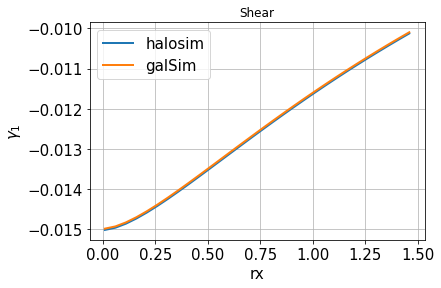

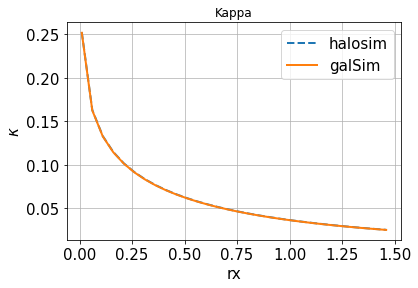

In [5]:
# create an WB00 halo
halo=halosim.nfw_lensWB00(ra=0.,dec=0.,redshift=0.3,mass=1e15,conc=0.1)
# create an galsim halo
pos_cl  =   galsim.PositionD(0.,0.)
haloGS  =   galsim.nfw_halo.NFWHalo(mass= 1e15,
            conc=0.1, redshift= 0.3,
            halo_pos=pos_cl ,omega_m= 0.3,
            omega_lam= 0.7)
rlist=np.arange(0.01,1.5,0.05)
nr=len(rlist)
klist=np.empty(nr)
slist=np.empty(nr)
klistG=np.empty(nr)
slistG=np.empty(nr)

for i in range(nr):
    ratio=rlist[i]
    klist[i]=halo.lensKernel(2.)*halo.Sigma(2000.*ratio,1000.*ratio)
    slist[i]=halo.lensKernel(2.)*halo.DeltaSigmaComplex(2000.*ratio,1000.*ratio).real
    klistG[i]=haloGS.getConvergence(pos=(2000.*ratio,1000.*ratio),\
                       z_s=np.ones(1)*2.,units = "arcsec")
    slistG[i]=haloGS.getShear(pos=(2000.*ratio,1000.*ratio),\
                        z_s=np.ones(1)*2.,units = "arcsec",reduced=False)[0]
    
assert np.max(np.abs(klist-klistG))/np.max(np.abs(klist))<1e-2
assert np.max(np.abs(slist-slistG))/np.max(np.abs(slist))<1e-2

plt.close()
plt.figure()
plt.plot(rlist,slist,label='halosim')
plt.plot(rlist,slistG,label='galSim')
plt.xlabel('rx',fontsize=15)
plt.ylabel(r'$\gamma_1$',fontsize=15)
plt.title('Shear')
plt.grid()
plt.legend(fontsize=15)

plt.figure()
plt.plot(rlist,klist,'--',label='halosim')
plt.plot(rlist,klistG,label='galSim')
plt.xlabel('rx',fontsize=15)
plt.ylabel(r'$\kappa$',fontsize=15)
plt.title('Kappa')
plt.grid()
plt.legend(fontsize=15)